# Project: Wrangle and analyze Data

## Table of Contents
- [Introduction](#intro)
- [Gathering data](#gather)
- [Assessing data](#assess)
   - [Quality](#quality)
   - [Tidiness](#tidiness)
- [Cleaning data](#clean)
- [Analyzing and visualizing data](#storing)
   - [Insight 1](#one)
   - [Insight 2](#two)
   - [Insight 3](#three)
   - [Insight 4](#four)

<a id='intro'></a>
## Introduction



For this project, we are going to wrangle, assess, clean and analyse the tweet archive of WeRateDogs, a twitter user which rates images of dog types. However, the data is spread on different sources, therefore we need do do some gathering and merging them into one dataset later. The purpose is to show how to access different data sources, get the data, assess it visually and programmatically, cleaning, analyzing and visualizing it.

<a id='gather'></a>
## Gathering data

**1. Twitter archive file**

In [214]:
# import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json 

In [215]:
# read local stored csv file
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [216]:
twitter_archive_enhanced.sort_values('timestamp')
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [217]:
# get short overview of twitter_archive_enhanced
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**2. Tweet image prediction**

In [218]:
# download image-predictions file programmaticaly 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t' )

In [311]:
auth = tweepy.OAuthHandler('', '')
auth.set_access_token('', '')
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)


**3. Twitter API & JSON**

In [ ]:
#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in twitter_archive_enhanced['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

In [ ]:
print("Number of tweets found" ,len(list_of_tweets))
print("Number of tweets not found" , len(cant_find_tweets_for_those_ids))

In [ ]:
#Then in this code block we isolate the json part of each tweepy 
#status object that we have downloaded and we add them all into a list

my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [222]:
#we write this list into a txt file:

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [223]:
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])


In [224]:
# show 5 first entries of tweet_json
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,38841,8601,6831327,103,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33266,6320,6831327,103,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,25063,4194,6831327,103,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,42214,8714,6831327,103,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,40361,9486,6831327,103,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [225]:
# get short overview of tweet_json
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 8 columns):
tweet_id            2345 non-null object
favorite_count      2345 non-null int64
retweet_count       2345 non-null int64
followers_count     2345 non-null int64
friends_count       2345 non-null int64
source              2345 non-null object
retweeted_status    2345 non-null object
url                 2345 non-null object
dtypes: int64(4), object(4)
memory usage: 146.6+ KB


<a id='assess'></a>
## Assessing data

### Visual assessment

Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes.

In [226]:
# asses twitter_archive_enhanced
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [227]:
# asses image_predictions
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [228]:
# asses tweet_json
tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,38841,8601,6831327,103,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33266,6320,6831327,103,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,25063,4194,6831327,103,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,42214,8714,6831327,103,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,40361,9486,6831327,103,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,20244,3137,6831327,103,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,11864,2090,6831327,103,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,65620,19066,6831327,103,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,27795,4300,6831327,103,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,31983,7480,6831327,103,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


### Programmatic assessment

Pandas' functions and/or methods are used to assess the data.

In [229]:
# get overview of dataset
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [230]:
# show number of duplicates of tweet_id in twitter_archive_enhanced
sum(twitter_archive_enhanced['tweet_id'].duplicated())

0

In [231]:
# value count for numerator
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [232]:
# show number of tweets with numerator lower than 10
twitter_archive_enhanced.query('rating_numerator < 10').count()

tweet_id                      440
in_reply_to_status_id          12
in_reply_to_user_id            12
timestamp                     440
source                        440
text                          440
retweeted_status_id             9
retweeted_status_user_id        9
retweeted_status_timestamp      9
expanded_urls                 430
rating_numerator              440
rating_denominator            440
name                          440
doggo                         440
floofer                       440
pupper                        440
puppo                         440
dtype: int64

In [233]:
# show entries where numerator are lower than 100
with pd.option_context('max_colwidth', 150):
    display(twitter_archive_enhanced[twitter_archive_enhanced.rating_numerator < 10]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
229,848212111729840128,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https:/...",6,10
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
387,826598799820865537,"I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",7,10
462,817502432452313088,RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,7,10
485,814578408554463233,RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,9,10
599,798682547630837760,RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…,8,10
605,798576900688019456,RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,1,10
730,781661882474196992,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,5,10
745,780092040432480260,RT @dog_rates: This is Hank. He's mischievous af. Doesn't even know what he was trying to do here. 8/10 quit the shit Hank damn https://t.c…,8,10


In [234]:
# show tweets where numerator have decimals
twitter_archive_enhanced.loc[twitter_archive_enhanced.text.str.contains(r"(\d+\.\d*\/\d+)")].text

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


45      This is Bella. She hopes her smile made you sm...
340     RT @dog_rates: This is Logan, the Chow who liv...
695     This is Logan, the Chow who lived. He solemnly...
763     This is Sophie. She's a Jubilant Bush Pupper. ...
1689    I've been told there's a slight possibility he...
1712    Here we have uncovered an entire battalion of ...
Name: text, dtype: object

In [235]:
# show tweets where nominators have decimals, print columns tweet_id, text, rating_denominator, rating_nominator
with pd.option_context('max_colwidth', 150):
    display(twitter_archive_enhanced[twitter_archive_enhanced['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://...,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [236]:
# get value counts for rating denominator
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [237]:
# show entries where rating denominator is greater than 10
with pd.option_context('max_colwidth', 150):
    display(twitter_archive_enhanced[twitter_archive_enhanced.rating_denominator > 10]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80


In [238]:
# show number of tweets with rating denominator greater than 10
twitter_archive_enhanced.query('rating_denominator > 10').count()

tweet_id                      20
in_reply_to_status_id          4
in_reply_to_user_id            4
timestamp                     20
source                        20
text                          20
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                 17
rating_numerator              20
rating_denominator            20
name                          20
doggo                         20
floofer                       20
pupper                        20
puppo                         20
dtype: int64

In [239]:
# show entries where rating denominator is lower than 10.
with pd.option_context('max_colwidth', 150):
    display(twitter_archive_enhanced[twitter_archive_enhanced.rating_denominator < 10]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t ...,24,7
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2


In [240]:
twitter_archive_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Lola           10
Penny          10
Tucker         10
Winston         9
Bo              9
the             8
Sadie           8
Buddy           7
Daisy           7
Toby            7
an              7
Bailey          7
Jack            6
Leo             6
Rusty           6
Bella           6
Jax             6
Milo            6
Koda            6
Scout           6
Oscar           6
Stanley         6
Dave            6
Sunny           5
             ... 
Franq           1
Hermione        1
Frönq           1
Skittle         1
Kallie          1
Dudley          1
Eugene          1
Chadrick        1
Jangle          1
Juckson         1
Lenox           1
Dex             1
Timmy           1
Brandonald      1
Crumpet         1
Akumi           1
Pippin          1
Bilbo           1
Creg            1
Zooey           1
Randall         1
Ronnie          1
Sailor          1
Maisey          1
Rueben    

In [241]:
twitter_archive_enhanced.loc[(twitter_archive_enhanced.name.str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [242]:
# get sample of data, only show text and name column
twitter_archive_enhanced[['text', 'name']].sample(20)

,text,name
977,Meet Piper. She's an airport doggo. Please ret...,Piper
1928,Herd of wild dogs here. Not sure what they're ...,None
1584,This pupper's New Year's resolution was to bec...,None
531,Here we have Burke (pupper) and Dexter (doggo)...,None
1632,This is Jeph. He's a Western Sagittarius Dookm...,Jeph
36,RT @dog_rates: This is Lilly. She just paralle...,Lilly
587,This is Sobe. She's a h*ckin happy doggo. Only...,Sobe
309,RT @dog_rates: Meet Lola. Her hobbies include ...,Lola
1386,This is Vincent. He's the man your girl is wit...,Vincent
149,Ladies and gentlemen... I found Pipsy. He may ...,None


In [243]:
# take a look at specific tweets by targeting columns
twitter_archive_enhanced.text[212]

'RT @eddie_coe98: Thanks @dog_rates completed my laptop. 10/10 would buy again https://t.co/bO0rThDlXI'

In [244]:
twitter_archive_enhanced.text[375]

'Beebop and Doobert should start a band 12/10 would listen'

In [245]:
twitter_archive_enhanced.text[416]

'Please stop sending in non-canines like this Very Pettable Dozing Bath Tortoise. We only rate dogs. Only send dogs... 12/10 https://t.co/mcagPeENIh'

In [246]:
# get sum for none entries in doogo to puppo columns
(twitter_archive_enhanced.loc[:,'doggo':'puppo'] != 'None').sum()

doggo       97
floofer     10
pupper     257
puppo       30
dtype: int64

In [247]:
for column in twitter_archive_enhanced.columns[-4:]:
    print(column, twitter_archive_enhanced.text.str.contains(column).sum())

doggo 98
floofer 4
pupper 272
puppo 37


In [248]:
# get counts for expanded url is null or not
twitter_archive_enhanced['expanded_urls'].isnull().value_counts()

False    2297
True       59
Name: expanded_urls, dtype: int64

In [249]:
# count values for source in twitter_archive_enhanced
twitter_archive_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [250]:
# get all entries where retweeted_status_id is null / nan
twitter_archive_enhanced[twitter_archive_enhanced['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [251]:
# get sample of image_predictions
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
148,668633411083464705,https://pbs.twimg.com/media/CUd2ieCUcAAexyT.jpg,1,Pekinese,0.589011,True,Shih-Tzu,0.390987,True,Japanese_spaniel,0.003310,True
1987,872620804844003328,https://pbs.twimg.com/media/DBwr_hzXkAEnZBW.jpg,1,cocker_spaniel,0.513191,True,Sussex_spaniel,0.159088,True,standard_poodle,0.149509,True
2025,881906580714921986,https://pbs.twimg.com/media/DD0pWm9XcAAeSBL.jpg,1,Weimaraner,0.291539,True,Chesapeake_Bay_retriever,0.278966,True,koala,0.127017,False
768,689280876073582592,https://pbs.twimg.com/media/CZDRTAPUoAEaqxF.jpg,3,Chihuahua,0.637546,True,American_Staffordshire_terrier,0.150694,True,Staffordshire_bullterrier,0.103953,True
134,668484198282485761,https://pbs.twimg.com/media/CUbu1GAWsAEH3E-.jpg,1,standard_poodle,0.587372,True,Bedlington_terrier,0.182411,True,Afghan_hound,0.040968,True
1901,851591660324737024,https://pbs.twimg.com/media/C9F2FG5WAAAJ0iN.jpg,1,Cardigan,0.394507,True,Chihuahua,0.077254,True,French_bulldog,0.076559,True
1973,869702957897576449,https://pbs.twimg.com/media/DBHOOfOXoAABKlU.jpg,1,Pembroke,0.993449,True,Cardigan,0.006325,True,Chihuahua,0.000178,True
1719,819227688460238848,https://pbs.twimg.com/media/C157Oq3WQAEOyHm.jpg,1,Border_terrier,0.482452,True,German_shepherd,0.181082,True,Norwegian_elkhound,0.065257,True
1931,859074603037188101,https://pbs.twimg.com/media/C-wLyufW0AA546I.jpg,1,revolver,0.190292,False,projectile,0.149064,False,fountain,0.066047,False
211,670003130994700288,https://pbs.twimg.com/media/CUxUSuaW4AAdQzv.jpg,1,beagle,0.375313,True,Saint_Bernard,0.174911,True,English_foxhound,0.115888,True


In [252]:
# get overview of image_predictions
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [253]:
# look for sum of duplicates for tweet_id in image_predictions
image_predictions.tweet_id.duplicated().sum()

0

In [254]:
# get sum of duplicated urls in image_predictions
sum(image_predictions.jpg_url.duplicated())

66

In [255]:
pd.concat(g for _, g in image_predictions.groupby("jpg_url") if len(g) > 1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [256]:
print(image_predictions.p1_dog.value_counts())
print(image_predictions.p2_dog.value_counts())
print(image_predictions.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [257]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [258]:
tweet_json.sample(10)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
1328,704871453724954624,4543,1217,6831384,103,Twitter for iPhone,Original tweet,https://t.co/mIQ1KoVsmU
148,862722525377298433,17474,3689,6831329,103,Twitter for iPhone,Original tweet,https://t.co/RGMQzkgo9c
1113,730211855403241472,4093,1148,6831383,103,Twitter for iPhone,Original tweet,https://t.co/K7pthJXjWE
439,819006400881917954,49025,21182,6831335,103,Twitter for iPhone,Original tweet,https://t.co/YOC1fHFCSb
1714,680070545539371008,2749,962,6831388,103,TweetDeck,Original tweet,https://t.co/Fh7geodBCU
1135,727155742655025152,3882,1450,6831383,103,Vine - Make a Scene,Original tweet,https://t.co/BRkhj6tdN0
1739,679001094530465792,3015,1351,6831388,103,Vine - Make a Scene,Original tweet,https://t.co/Ajquq6oGSg
651,791026214425268224,0,4666,6831338,103,Twitter for iPhone,This is a retweet,This is a retweet
1587,686035780142297088,1239,134,6831387,103,Twitter for iPhone,Original tweet,g
799,771380798096281600,11464,5723,6831339,103,Twitter for iPhone,Original tweet,https://t.co/sPB5JMnWBn


In [259]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 8 columns):
tweet_id            2345 non-null object
favorite_count      2345 non-null int64
retweet_count       2345 non-null int64
followers_count     2345 non-null int64
friends_count       2345 non-null int64
source              2345 non-null object
retweeted_status    2345 non-null object
url                 2345 non-null object
dtypes: int64(4), object(4)
memory usage: 146.6+ KB


In [260]:
tweet_json.retweeted_status.value_counts()

Original tweet       2175
This is a retweet     170
Name: retweeted_status, dtype: int64

In [261]:
tweet_json.source.value_counts()

Twitter for iPhone     2210
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

<a id='quality'></a>
### Quality

*Completeness, validity, accuracy, consistency (content issues)*

### twitter_archive_enhanced

These are the insights we get from visual and prorgrammatic assessment:
- replies and retweets are included in our dataset
- there are erroneous datatypes
- we found that there that some tweets have missing infos in the expanded url column
- there are "None" (string format) in name, doggo, floofer, pupper and puppo column instead of NaN
- there are numerators with decimals. In this case, this leads to erroneous entries in the numerator column, as only the value after the dot is catched. There are also some cases, where there are several values in one tweet, one being a date (e.g. 9/11, see tweet_id 784).
- there are denominators other than 10 (smaller or bigger)
- we only want to keep original ratings that have images and get rid of retweets
- columns, which we are not going to use for analysis will be deleted
- names are sometimes missing even if there are names in tweets 
- retweeted_status_timestamp, timestamp are formatted as object, but should be datetime instead

### image_predictions

These are the insights we get for the image_predictions dataset:

- There are duplicated entries for jpg_url

### tweet_json

These are the insights for tweet_json data

- Retweets are part of the dataset


<a id='tidiness'></a>
### Tidiness 

- Data separated into three different data sets, we need them in one
- variables separated in different columns, e.g. dog stage (doggo, fluffer, etc.)
- p1, p2, p3 columns all contain predictions, which means they contain the same data type

<a id='clean'></a>
## Cleaning the Data

In [262]:
# create copies of the datasets in order to keep original ones
twitter_archive_clean = twitter_archive_enhanced.copy()
image_prediction_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

In [263]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Cleaning twitter_archive

#### 1. Retweets

**Define**

Issue: Dataset contains retweets.

ToDo: Get rid of retweets

**Code**

In [264]:
# get rid of retweets
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

In [265]:
print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))

0


**Test**

In [266]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### 2. Unnesessary columsn

**Define**

Issue: There are coumns in our dataset that we don't need.

ToDo: Getting rid of columns we don't need.

**Code**

In [267]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [268]:
# drop columns
twitter_archive_clean = twitter_archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

**Test**

In [269]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### 3. Inaccurate numerators** 

**Define**

Issue: There are nummerators which aren't matching the values we find in the text column. It seems that the numertors have been interpreted wrong.

ToDo: Correct the numerators which haven't been interpreted right

**Code**

In [270]:
#convert datatype to float
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 186.9+ KB


In [271]:
# manually correct nummerators
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

**Test**

In [272]:
# check if the numerators have been correted. Set colwidth to 200 in order to see whole text.
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


#### 3. One Column for dog stages

**Define**

Issue: In our dataset, we have 4 different columns for dog stages.

ToDo: We are going to extract the dog stage from the text column by using regular expression. This hopefully will also adress another issue we have, which is the none entries instead of NaN.


**Code**

In [273]:
# Extract dog stages from text column, store it into a dog stage column. Extration by regex.
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [274]:
# Confirm that the extraction matches up
twitter_archive_clean[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].head(15)

,dog_stage,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None
5,NaN,None,None,None,None
6,NaN,None,None,None,None
7,NaN,None,None,None,None
8,NaN,None,None,None,None
9,doggo,doggo,None,None,None


In [275]:
# Drop doggo, floofer, pupper, and puppo columns
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

**Test**

In [276]:
twitter_archive_clean['dog_stage'].value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_stage, dtype: int64

In [277]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
dog_stage             364 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 135.9+ KB


#### 4. Timestamp datatype not timestamp

**Define**

Issue: Data in column 'timestamp' currently has the data type object.

ToDO: Convert datatype of 'timestammp' column into from object to datetime.

**Code**

In [278]:
# delete time zone information from timestamp
twitter_archive_clean['timestamp'] = twitter_archive_clean['timestamp'].str.slice(start=0, stop=-6)

In [279]:
# convert timestamp to a datetime object
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'], format = "%Y-%m-%d %H:%M:%S")

**Test**

In [280]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
dog_stage             364 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 135.9+ KB


#### 6. Correct denominators / numeratos

**Define**

Issue: The dataset contains denominators which are greater or lower than 10. As 10 is defined as the denominator, a value lower or greater than 10 is an issue in our dataset.

ToDo: Update denominator / numerator where it makes sense. Delete tweets which do not contain actual rating, as they are not of any interest for us.

**Code**

In [281]:
# Manually update numerators and denominators

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

#get rid of tweed_ids which do not contain actual ratings
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 832088576586297345]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 810984652412424192]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 682808988178739200]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 835246439529840640]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 686035780142297088]

Programmatically handle denominators which are bigger than 10.

In case we have a denominator bigger than ten, the rating contains several dogs. Example: tweet_id 758467244762497024

As we want to do a comparizon later, we need to standardize the rating. Therefore we have to create a new column and store the standardized rating into it.

In [282]:
# create new column named standardized_rating and datatype float
twitter_archive_clean['standardized_rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'].astype(float)


**Test**

In [283]:
twitter_archive_clean.sample(20)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,standardized_rating
1549,689255633275777024,2016-01-19 01:18:43,This is Ferg. He swallowed a chainsaw. 1 like ...,10.0,10.0,Ferg,NaN,1.0
1704,680889648562991104,2015-12-26 23:15:17,This is Cheesy. It's her birthday. She's patie...,9.0,10.0,Cheesy,NaN,0.9
186,856288084350160898,2017-04-23 23:26:03,@xianmcguire @Jenna_Marbles Kardashians wouldn...,14.0,10.0,None,NaN,1.4
628,794926597468000259,2016-11-05 15:37:24,This is Mack. He's rather h*ckin sleepy. Excep...,12.0,10.0,Mack,NaN,1.2
2283,667200525029539841,2015-11-19 04:39:35,This is Joshwa. He is a fuckboy supreme. He cl...,11.0,10.0,Joshwa,NaN,1.1
1922,674255168825880576,2015-12-08 15:52:13,Say hello to Bobbay. He's a marshmallow wizard...,10.0,10.0,Bobbay,NaN,1.0
1581,687124485711986689,2016-01-13 04:10:18,Say hello to Samson. He's a Firecracker Häagen...,11.0,10.0,Samson,NaN,1.1
2007,672264251789176834,2015-12-03 04:01:02,This is Kreg. He has the eyes of a tyrannical ...,10.0,10.0,Kreg,NaN,1.0
1293,708026248782585858,2016-03-10 20:26:26,Everybody stop what you're doing and watch thi...,13.0,10.0,None,NaN,1.3
2065,671151324042559489,2015-11-30 02:18:39,*struggling to breathe properly* 12/10 https:/...,12.0,10.0,None,NaN,1.2


#### 7. Correct or tweets with missing or false names

**Define**

Issue: In some cases, names are missing but are actually appearing in text.

ToDo: Edit them.

**Code**

In [284]:
# Search for all names which start with lowercase letters
lowercase_names = []
for row in twitter_archive_clean['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [285]:
# Replace names with lowercases letters with NaN
twitter_archive_clean['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all None with NaN
twitter_archive_clean['name'].replace('None', 
                        np.nan,
                       inplace = True)

**Test**

In [286]:
twitter_archive_clean['name'].value_counts()

Lucy         11
Charlie      11
Oliver       10
Cooper       10
Tucker        9
Penny         9
Lola          8
Sadie         8
Winston       8
Daisy         7
Toby          7
Bailey        6
Jax           6
Koda          6
Stanley       6
Bo            6
Bella         6
Oscar         6
Buddy         5
Dave          5
Rusty         5
Scout         5
Chester       5
Milo          5
Bentley       5
Louis         5
Leo           5
Clarence      4
Gus           4
Derek         4
             ..
Scruffers     1
Jessifer      1
Vixen         1
Pip           1
Mitch         1
Sora          1
Hector        1
Orion         1
Bodie         1
Boots         1
Petrick       1
Bubba         1
Superpup      1
Malikai       1
Theo          1
Marlee        1
Lucia         1
Anna          1
Tito          1
Adele         1
Carbon        1
Bradley       1
Saydee        1
Lilli         1
Lugan         1
Laela         1
Karl          1
Kuyu          1
Barry         1
Tuck          1
Name: name, Length: 930,

### Cleaning image_prediction

#### 1. Duplicate URLs in image_prediction

**Define**

Issue: We have duplicate entries in the jpg_url column.

ToDO: Drop duplicate entries

**Code**

In [287]:
#drop duplicates and only keep the last entry if duplicate
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

**Test**

In [288]:
sum(image_prediction_clean['jpg_url'].duplicated())

0

#### 2. Multiple image_prediction and confidence level columns

Issue: Currently, there are multiple columns for image predictions and confidence level.

ToDO: We only want to have one column for image predictions and one column for confindence levels. Therefore we are going to create now columns, store the values in it and get rid of the unneccessary columns later.

**Code**

In [289]:
#store the first predictions, which are true, into the following lists
dog_types = []
confidence_level = []

#capture the dog type and confidence level from the first true prediction
def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_types.append(image_prediction_clean['p1'])
        confidence_level.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_types.append(image_prediction_clean['p2'])
        confidence_level.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_types.append(image_prediction_clean['p3'])
        confidence_level.append(image_prediction_clean['p3_conf'])
    else:
        dog_types.append('Error')
        confidence_level.append('Error')
        
image_prediction_clean.apply(image, axis=1)

# create new columns dog_types and 
image_prediction_clean['dog_types'] = dog_types
image_prediction_clean['confidence_level'] = confidence_level

In [290]:
# drop entries which have error in it
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_types'] != 'Error']

**Test**

In [291]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id            1691 non-null int64
jpg_url             1691 non-null object
img_num             1691 non-null int64
p1                  1691 non-null object
p1_conf             1691 non-null float64
p1_dog              1691 non-null bool
p2                  1691 non-null object
p2_conf             1691 non-null float64
p2_dog              1691 non-null bool
p3                  1691 non-null object
p3_conf             1691 non-null float64
p3_dog              1691 non-null bool
dog_types           1691 non-null object
confidence_level    1691 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


**Code**

In [292]:
#Delete columns which we don't need anymore
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

**Test**

In [293]:
list(image_prediction_clean)

['tweet_id', 'jpg_url', 'dog_types', 'confidence_level']

### Clean tweet_json

#### 1. Retweets in tweet_json

Define: There are retweets in tweet_json

ToDo: Delete retweets and only keep original ones.

**Code**

In [294]:
tweet_json_clean['retweeted_status'].value_counts()

Original tweet       2175
This is a retweet     170
Name: retweeted_status, dtype: int64

In [295]:
tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'] == 'Original tweet']

**Test**

In [296]:
tweet_json_clean['retweeted_status'].value_counts()

Original tweet    2175
Name: retweeted_status, dtype: int64

In [297]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2344
Data columns (total 8 columns):
tweet_id            2175 non-null object
favorite_count      2175 non-null int64
retweet_count       2175 non-null int64
followers_count     2175 non-null int64
friends_count       2175 non-null int64
source              2175 non-null object
retweeted_status    2175 non-null object
url                 2175 non-null object
dtypes: int64(4), object(4)
memory usage: 152.9+ KB


### Join Datasets

#### Dataype of tweet_id in tweet_json_clean

**Define*

Issue: Datatype of tweet_id in tweet_json_clean ist object

ToDO: In order to be able to do a merge later, we need to transform object into int.

**Code**

In [298]:
#change datatype of tweet_id from object into int
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(int)

**Test**

In [299]:
tweet_json_clean['tweet_id'].dtypes

dtype('int64')

#### Joining multiple datasets into one

**Define**

Issue: We have different datasets

ToDo: We want to merge them into one.

**Code**

In [300]:
#merge datasets
df1 = pd.merge(twitter_archive_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])

#only keep entries which have a url / picture
df1 = df1[df1['jpg_url'].notnull()]

**Test**

In [301]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 1 to 2169
Data columns (total 11 columns):
tweet_id               1625 non-null int64
timestamp              1625 non-null datetime64[ns]
text                   1625 non-null object
rating_numerator       1625 non-null float64
rating_denominator     1625 non-null float64
name                   1142 non-null object
dog_stage              266 non-null object
standardized_rating    1625 non-null float64
jpg_url                1625 non-null object
dog_types              1625 non-null object
confidence_level       1625 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 152.3+ KB


**Code**

In [302]:
df2 = pd.merge(df1, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

**Test**

In [303]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 18 columns):
tweet_id               1625 non-null int64
timestamp              1625 non-null datetime64[ns]
text                   1625 non-null object
rating_numerator       1625 non-null float64
rating_denominator     1625 non-null float64
name                   1142 non-null object
dog_stage              266 non-null object
standardized_rating    1625 non-null float64
jpg_url                1625 non-null object
dog_types              1625 non-null object
confidence_level       1625 non-null object
favorite_count         1625 non-null int64
retweet_count          1625 non-null int64
followers_count        1625 non-null int64
friends_count          1625 non-null int64
source                 1625 non-null object
retweeted_status       1625 non-null object
url                    1625 non-null object
dtypes: datetime64[ns](1), float64(3), int64(5), object(9)
memory usage: 241.2+ KB


In [304]:
#store the cleaned datatset into a csv
df2.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

<a id='storing'></a>
## Analyzing and visualizing data

<a id='one'></a>
### Insight 1

Question: What is the most rated dog stage?

**Code**

In [305]:
# calculate number of ratings for dog stages
df2['dog_stage'].value_counts()

pupper     179
doggo       58
puppo       26
floofer      3
Name: dog_stage, dtype: int64

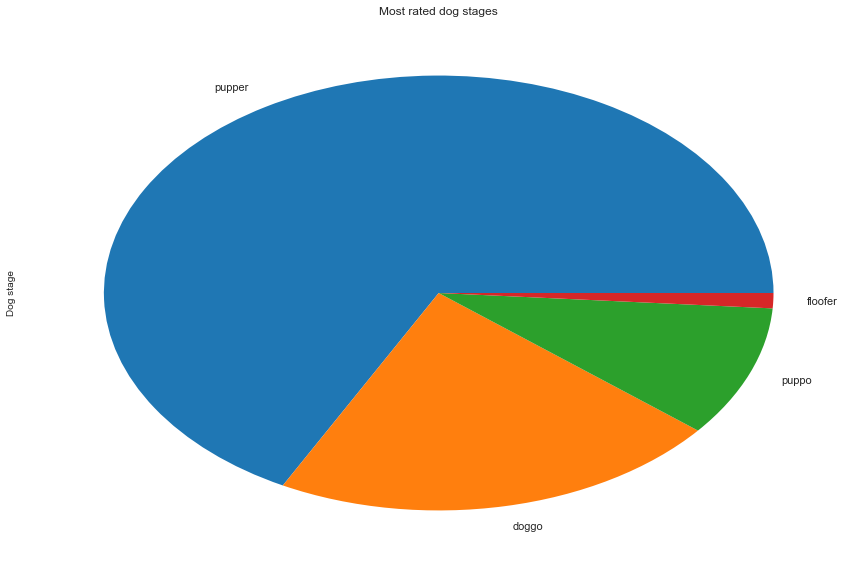

In [306]:
# plot number of ratings per dog stage into a pie chart
df_dog_stage = df2.groupby('dog_stage').filter(lambda x: len(x) >= 0)

df_dog_stage['dog_stage'].value_counts().plot(kind = 'pie', figsize = (15,10),fontsize=11)
plt.title('Most rated dog stages')
plt.ylabel('Dog stage')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

The most rated dog stage is pupper, the less rated stage floofer.

## <a id='two'></a>
### Insight 2
Question: Which dog stage has the highest mean standardized rating?

**Code**

In [307]:
# calculate mean grouped by dog stage
dog_stage_mean = df2.groupby('dog_stage').mean()
dog_stage_mean

,tweet_id,rating_numerator,rating_denominator,standardized_rating,favorite_count,retweet_count,followers_count,friends_count
dog_stage,,,,,,,,
doggo,7.994624e+17,11.672414,10.000000,1.167241,16174.051724,5688.672414,6.831346e+06,103.0
floofer,8.199891e+17,12.666667,10.000000,1.266667,22496.000000,8271.333333,6.831334e+06,103.0
pupper,7.187736e+17,13.738883,12.681564,1.080592,6962.044693,2148.128492,6.831379e+06,103.0
puppo,8.199939e+17,12.115385,10.000000,1.211538,23358.500000,6724.115385,6.831343e+06,103.0


In [308]:
# sort dog stage by standardized rating
dog_stage_sorted = dog_stage_mean['standardized_rating'].sort_values()

dog_stage_sorted

dog_stage
pupper     1.080592
doggo      1.167241
puppo      1.211538
floofer    1.266667
Name: standardized_rating, dtype: float64

Pupper have the lowest mean standardized rating, floofer the highest.

<a id='three'></a>
### Insight 3

Question: How did the standardized ratings developed over time?

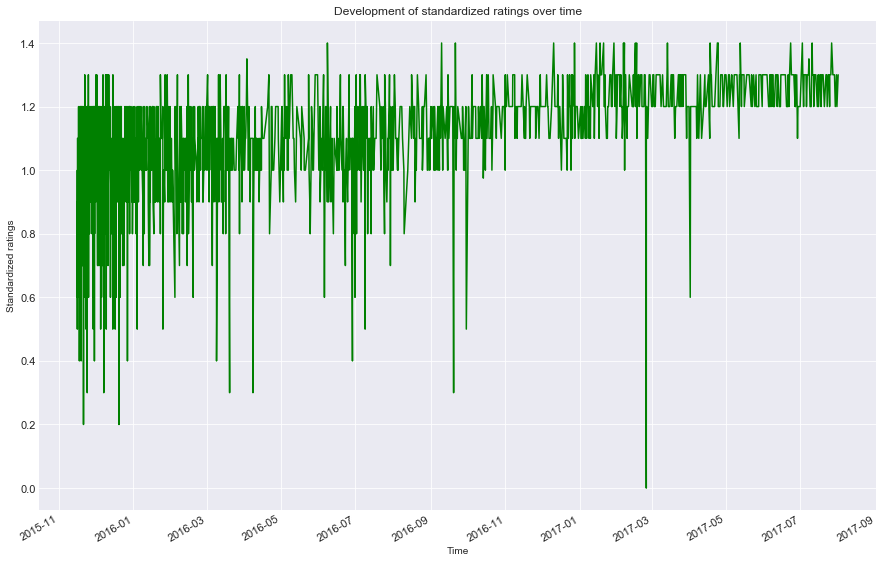

In [309]:
# grouping data by timestamp and plot the mean of the standardized rating. Plot it into a line chart and define color, size, etc.
df2.groupby('timestamp')['standardized_rating'].mean().plot(kind='line', figsize = (15,10),fontsize=11, color="g")
plt.title('Development of standardized ratings over time')
plt.xlabel('Time')
plt.ylabel('Standardized ratings')
plt.show;

Taking a look at this plot shows us, that in the beginning there were quite some standardized ratings below 1. After some time, the standardized ratings below 1 seem to appear less often.

<a id='four'></a>
### Insight 4

What are the top 20 rated dog types?

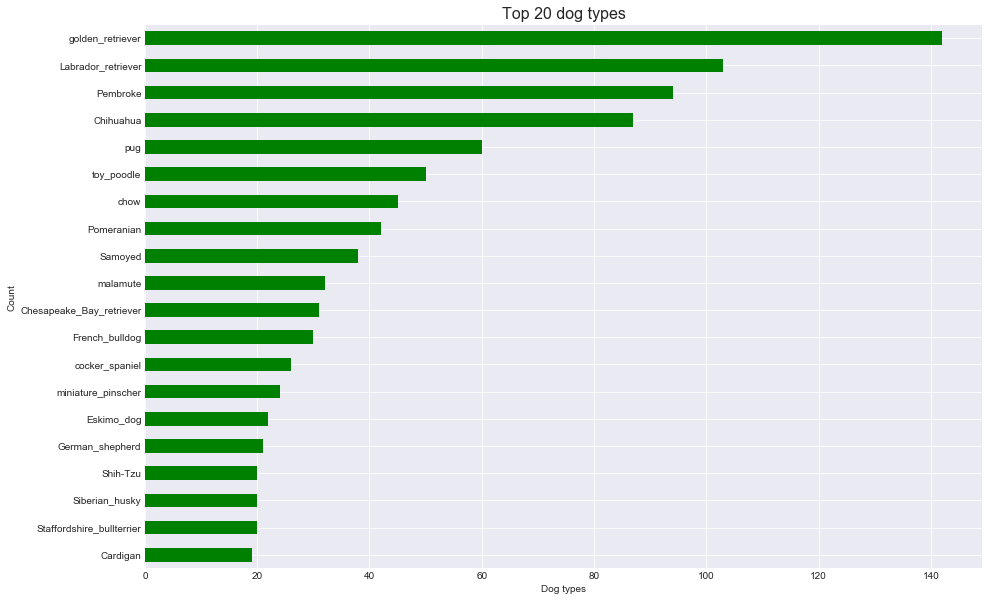

In [310]:
# plot top 20 dog types by number of rating into a barchart
df_dog_types = df2.groupby('dog_types').standardized_rating.count()
df_dog_types.nlargest(20).plot(kind='barh', figsize = (15,10), color = 'g', legend=False);
plt.title('Top 20 dog types', fontsize=16)
plt.xlabel('Dog types')
plt.ylabel('Count')
plt.gca().invert_yaxis()

Golden Retriever are the most rated dog types.

#### Sources:

- Udacity course material
- Call data from twitter search api: https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api
- Regex https://regex101.com/, https://docs.python.org/2/howto/regex.html
- Merge dataframes: https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/
- drop rows: https://stackoverflow.com/questions/14661701/how-to-drop-a-list-of-rows-from-pandas-dataframe
- extract parts of a string using regex: https://stackoverflow.com/questions/44922259/python-using-regex-to-extract-parts-of-a-string-in-pandas-column, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html
- Pandas pd.isnull function: https://stackoverflow.com/questions/38383037/pandas-pd-isnull-function, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html